In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('SunCountry.csv')

In [4]:
df.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN


In [5]:
df.shape

(3435388, 26)

In [6]:
df['MarketingAirlineCode'].value_counts()

SY    3430350
F9       3319
HA       1705
FI         13
DE          1
Name: MarketingAirlineCode, dtype: int64

In [7]:
df_sy = df[df['MarketingAirlineCode'] == 'SY']

In [8]:
df_sy.duplicated().sum()

142809

In [9]:
df_sy[df_sy.duplicated(keep = False)]

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
61,AABMXA,3372106573898,2,LAS,MSP,2013-01-02,2013-02-27,BURDMA,4255524449545444696420493F7C206765742074686973...,M,37411.0,60.0,NaN,Coach,Coach,SY Vacation,257.48,298.59,NaN,NaN,NaN,SCV,NaN,102,SY,O
62,AABMXA,3372106573898,1,MSP,LAS,2013-01-02,2013-02-24,BURDMA,4255524449545444696420493F7C206765742074686973...,M,37411.0,60.0,NaN,Coach,Coach,SY Vacation,257.48,298.59,NaN,NaN,NaN,SCV,NaN,101,SY,NaN
63,AABMXA,3372106573898,2,LAS,MSP,2013-01-02,2013-02-27,BURDMA,4255524449545444696420493F7C206765742074686973...,M,37411.0,60.0,NaN,Coach,Coach,SY Vacation,257.48,298.59,NaN,NaN,NaN,SCV,NaN,102,SY,O
64,AABMXA,3372106573898,1,MSP,LAS,2013-01-02,2013-02-24,BURDMA,4255524449545444696420493F7C206765742074686973...,M,37411.0,60.0,NaN,Coach,Coach,SY Vacation,257.48,298.59,NaN,NaN,NaN,SCV,NaN,101,SY,NaN
65,AABMXA,3372106573899,1,MSP,LAS,2013-01-02,2013-02-24,JENSJE,4A454E534F4E44696420493F7C20676574207468697320...,M,39561.0,54.0,NaN,Coach,Coach,SY Vacation,257.48,298.59,NaN,NaN,NaN,SCV,NaN,101,SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435147,ZZRWDR,3372106461547,2,CUN,MSP,2012-10-31,2013-03-31,MCLACH,4D434C41494E44696420493F7C20676574207468697320...,M,41453.0,49.0,55426,Coach,Coach,Reservations Booking,368.00,476.56,201534701.0,Standard,False,CUNVIP,2008-03-05 16:24:46.0000000,572,SY,O
3435206,ZZWWFM,3372106609365,2,MCO,MSP,2013-01-18,2013-02-27,ROESAN,524F4553455244696420493F7C20676574207468697320...,F,34988.0,67.0,NaN,Coach,Coach,SCA Website Booking,269.76,311.80,NaN,NaN,NaN,NaN,NaN,346,SY,O
3435207,ZZWWFM,3372106609365,1,MSP,MCO,2013-01-18,2013-02-18,ROESAN,524F4553455244696420493F7C20676574207468697320...,F,34988.0,67.0,NaN,Coach,Coach,SCA Website Booking,269.76,311.80,NaN,NaN,NaN,NaN,NaN,345,SY,NaN
3435208,ZZWWFM,3372106609365,2,MCO,MSP,2013-01-18,2013-02-27,ROESAN,524F4553455244696420493F7C20676574207468697320...,F,34988.0,67.0,NaN,Coach,Coach,SCA Website Booking,269.76,311.80,NaN,NaN,NaN,NaN,NaN,346,SY,O


In [49]:
df3 = df_sy.drop_duplicates()

In [11]:
df3.shape

(3287541, 26)

In [12]:
df3.isnull().sum()

PNRLocatorID                  0
TicketNum                     0
CouponSeqNbr                  0
ServiceStartCity              0
ServiceEndCity                0
PNRCreateDate                 0
ServiceStartDate              0
PaxName                       0
EncryptedName                 0
GenderCode                29514
birthdateid               29514
Age                       29514
PostalCode              2613242
BkdClassOfService             0
TrvldClassOfService           0
BookingChannel                0
BaseFareAmt                   0
TotalDocAmt                   0
UFlyRewardsNumber       2609249
UflyMemberStatus        2609249
CardHolder              2609249
BookedProduct           2159107
EnrollDate              2609249
MarketingFlightNbr            0
MarketingAirlineCode          0
StopoverCode            1645453
dtype: int64

In [50]:
df3['Member'] = ['X' if pd.isna(i) else 'O' for i in df3['EnrollDate']]

In [14]:
df3

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,Member
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O,X
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN,X
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O,X
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN,X
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435383,ZZZDRU,3372107838142,1,MSP,SEA,2014-08-23,2014-12-17,VAN WA,56414E2042494E5342455247454E44696420493F7C2067...,M,30152.0,82.0,56265,Coach,Coach,SCA Website Booking,239.07,285.2,190110782.0,Standard,False,SSWMI,2007-12-18 10:52:08.0000000,283,SY,NaN,O
3435384,ZZZDTU,3372106802007,2,SFO,MSP,2013-05-04,2013-07-14,STONDO,53544F4E4544696420493F7C2067657420746869732072...,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,396,SY,O,O
3435385,ZZZDTU,3372106802007,1,MSP,SFO,2013-05-04,2013-07-10,STONDO,53544F4E4544696420493F7C2067657420746869732072...,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,391,SY,NaN,O
3435386,ZZZNBD,3372106947027,1,MSP,SFO,2013-07-21,2013-08-22,CHORE,43484F44696420493F7C20676574207468697320726967...,F,52857.0,18.0,55449,Coach,Coach,SCA Website Booking,146.98,168.9,210391031.0,Standard,False,NaN,2013-07-21 19:46:41.0000000,395,SY,NaN,O


In [16]:
df3.describe()

,TicketNum,CouponSeqNbr,birthdateid,Age,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber
count,3.287541e+06,3.287541e+06,3.258027e+06,3.258027e+06,3.287541e+06,3.287541e+06,6.782920e+05
mean,3.374371e+12,1.460538e+00,4.491284e+04,4.024423e+01,2.851454e+02,3.121746e+02,2.042148e+08
std,2.585750e+09,5.731792e-01,7.040379e+03,1.926115e+01,1.803774e+02,2.110789e+02,1.484329e+07
min,3.372052e+12,1.000000e+00,-6.752900e+05,-2.883000e+03,0.000000e+00,0.000000e+00,1.000002e+08
25%,3.372107e+12,1.000000e+00,3.957900e+04,2.600000e+01,1.720900e+02,1.882000e+02,2.008594e+08
50%,3.372108e+12,1.000000e+00,4.499900e+04,4.000000e+01,2.697600e+02,2.988000e+02,2.029668e+08
75%,3.377301e+12,2.000000e+00,5.013200e+04,5.500000e+01,3.665200e+02,4.102000e+02,2.103804e+08
max,3.379578e+12,8.000000e+00,1.112840e+06,2.012000e+03,4.342000e+03,1.757200e+04,2.410863e+08


In [15]:
df3.dtypes

PNRLocatorID             object
TicketNum                 int64
CouponSeqNbr              int64
ServiceStartCity         object
ServiceEndCity           object
PNRCreateDate            object
ServiceStartDate         object
PaxName                  object
EncryptedName            object
GenderCode               object
birthdateid             float64
Age                     float64
PostalCode               object
BkdClassOfService        object
TrvldClassOfService      object
BookingChannel           object
BaseFareAmt             float64
TotalDocAmt             float64
UFlyRewardsNumber       float64
UflyMemberStatus         object
CardHolder               object
BookedProduct            object
EnrollDate               object
MarketingFlightNbr       object
MarketingAirlineCode     object
StopoverCode             object
Member                   object
dtype: object

In [51]:
df3['PNRCreateDate'] = pd.to_datetime(df3['PNRCreateDate'])
df3['ServiceStartDate'] = pd.to_datetime(df3['ServiceStartDate'])
df3['EnrollDate'] = pd.to_datetime(df3['EnrollDate'])

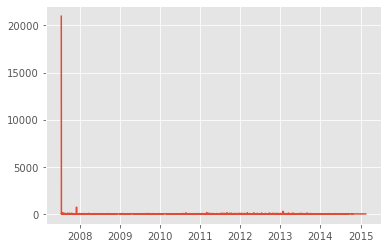

In [18]:
plt.style.use('ggplot')
plt.plot(df3['EnrollDate'].value_counts().sort_index())

In [19]:
df3['EnrollDate'].value_counts().sort_index()

2007-07-17 00:00:00    20969
2007-07-17 01:21:42       27
2007-07-17 01:52:48        3
2007-07-17 01:53:58        1
2007-07-17 01:55:01        2
                       ...  
2015-01-29 14:34:32        4
2015-02-03 11:04:20        1
2015-02-05 16:56:30        3
2015-02-10 20:32:37        2
2015-02-16 07:51:21        1
Name: EnrollDate, Length: 192105, dtype: int64

In [52]:
df3['Year'] = df3['ServiceStartDate'].apply(lambda x: x.strftime('%Y'))
df3['Month'] = df3['ServiceStartDate'].apply(lambda x: x.strftime('%m'))

In [21]:
df3['Year'].value_counts().sort_index()

2013    1496078
2014    1791463
Name: Year, dtype: int64

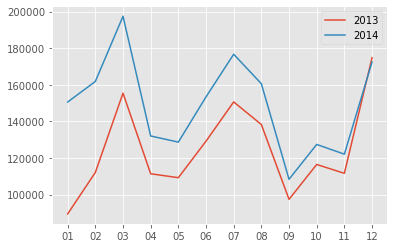

In [22]:
plt.plot(df3[df3['Year'] == '2013']['Month'].value_counts().sort_index(), label = '2013')
plt.plot(df3[df3['Year'] == '2014']['Month'].value_counts().sort_index(), label = '2014')
plt.legend()

In [53]:
df3['bookdays'] = df3['ServiceStartDate'] - df3['PNRCreateDate']
df3.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,Member,Year,Month,bookdays
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,244,SY,O,X,2013,12,20 days
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,243,SY,NaN,X,2013,12,15 days
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,397,SY,O,X,2014,02,19 days
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,392,SY,NaN,X,2014,02,16 days
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaT,342,SY,NaN,X,2014,04,41 days


In [54]:
df3['bookdays'] = df3['bookdays'].apply(lambda day: day.days)

In [55]:
df3['bookdays']

0           20
1           15
2           19
3           16
4           41
          ... 
3435383    116
3435384     71
3435385     67
3435386     32
3435387     83
Name: bookdays, Length: 3287541, dtype: int64

<AxesSubplot:>

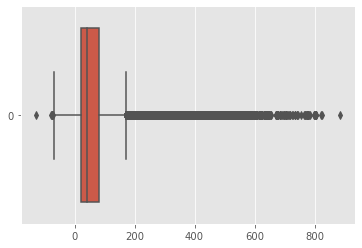

In [40]:
sns.boxplot(data = df3['bookdays'], orient="h")

In [44]:
df3['bookdays'].value_counts().sort_index().head(20)

-129        1
-79         1
-76         1
-74         2
-72         1
-70         2
-32         1
-27         1
-22         1
-16         1
-7          1
-4          2
-3          1
-2          1
-1         48
 0      27188
 1      39208
 2      26405
 3      30988
 4      25553
Name: bookdays, dtype: int64

In [45]:
df3 = df3[df3['bookdays'] >= 0]

In [46]:
df3['bookdays'].value_counts()

0      27188
1      39208
2      26405
3      30988
4      25553
       ...  
803        2
806        1
822        1
823        1
885        1
Name: bookdays, Length: 666, dtype: int64

In [87]:
df3[df3['bookdays']>365]['bookdays'].value_counts()

373    40
390    40
383    39
421    39
400    38
       ..
676     1
605     1
656     1
687     1
525     1
Name: bookdays, Length: 300, dtype: int64

<AxesSubplot:>

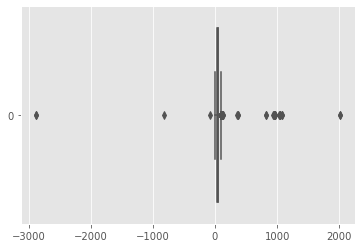

In [48]:
sns.boxplot(data = df3['Age'], orient="h")

df2['Age'].fillna(df2['Age'].mean(), inplace = True)

In [67]:
print(df3['Age'].isna().sum())
print(df3['Age'].isna().sum() / len(df3['Age']))
df_age = df3.dropna(subset = ['Age'])

29514
0.00897753062243178


In [66]:
df_age.isna().sum()

PNRLocatorID                  0
TicketNum                     0
CouponSeqNbr                  0
ServiceStartCity              0
ServiceEndCity                0
PNRCreateDate                 0
ServiceStartDate              0
PaxName                       0
EncryptedName                 0
GenderCode                    0
birthdateid                   0
Age                           0
PostalCode              2585913
BkdClassOfService             0
TrvldClassOfService           0
BookingChannel                0
BaseFareAmt                   0
TotalDocAmt                   0
UFlyRewardsNumber       2581927
UflyMemberStatus        2581927
CardHolder              2581927
BookedProduct           2153745
EnrollDate              2581927
MarketingFlightNbr            0
MarketingAirlineCode          0
StopoverCode            1629912
Member                        0
Year                          0
Month                         0
bookdays                      0
dtype: int64

In [65]:
# IQR
Q1 = np.percentile(df_age['Age'], 25)
Q3 = np.percentile(df_age['Age'], 75)
IQR = Q3 - Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR',IQR)
# Above Upper bound
upper = df_age['Age'] >= (Q3 + 1.5*IQR)

#print("Upper bound:",upper)
print(df_age[upper == True]['Age'])
 
# Below Lower bound
lower = df_age['Age'] <= (Q1-1.5*IQR)
print(df_age[lower == True]['Age'])
#print("Lower bound:", lower)
#print(np.where(lower))
print(len(df_age[upper == True]['Age'])+len(df_age[lower == True]['Age']))

Q1: 26.0
Q3: 55.0
IQR 29.0
12808      102.0
12809      102.0
12810      104.0
12811      104.0
12812      106.0
           ...  
3424569    108.0
3424570    108.0
3426871    104.0
3426872    104.0
3427471     99.0
Name: Age, Length: 2004, dtype: float64
742352    -2883.0
742353    -2883.0
1276508     -81.0
2933579    -829.0
Name: Age, dtype: float64
2008


In [74]:
df_new = df_age[(lower == False) & (upper == False)]
df_new

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,Member,Year,Month,bookdays
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,244,SY,O,X,2013,12,20
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,243,SY,NaN,X,2013,12,15
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,397,SY,O,X,2014,02,19
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,392,SY,NaN,X,2014,02,16
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaT,342,SY,NaN,X,2014,04,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435383,ZZZDRU,3372107838142,1,MSP,SEA,2014-08-23,2014-12-17,VAN WA,56414E2042494E5342455247454E44696420493F7C2067...,M,30152.0,82.0,56265,Coach,Coach,SCA Website Booking,239.07,285.2,190110782.0,Standard,False,SSWMI,2007-12-18 10:52:08,283,SY,NaN,O,2014,12,116
3435384,ZZZDTU,3372106802007,2,SFO,MSP,2013-05-04,2013-07-14,STONDO,53544F4E4544696420493F7C2067657420746869732072...,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13,396,SY,O,O,2013,07,71
3435385,ZZZDTU,3372106802007,1,MSP,SFO,2013-05-04,2013-07-10,STONDO,53544F4E4544696420493F7C2067657420746869732072...,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13,391,SY,NaN,O,2013,07,67
3435386,ZZZNBD,3372106947027,1,MSP,SFO,2013-07-21,2013-08-22,CHORE,43484F44696420493F7C20676574207468697320726967...,F,52857.0,18.0,55449,Coach,Coach,SCA Website Booking,146.98,168.9,210391031.0,Standard,False,NaN,2013-07-21 19:46:41,395,SY,NaN,O,2013,08,32


In [75]:
df_new['Trip'] = df_new['ServiceStartCity'] + '_' + df_new['ServiceEndCity']
df_new.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,Member,Year,Month,bookdays,Trip
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,244,SY,O,X,2013,12,20,JFK_MSP
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaT,243,SY,NaN,X,2013,12,15,MSP_JFK
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,397,SY,O,X,2014,02,19,MSP_SFO
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaT,392,SY,NaN,X,2014,02,16,SFO_MSP
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaT,342,SY,NaN,X,2014,04,41,MCO_MSP


In [76]:
df_new['Trip'].value_counts().head(20)

LAS_MSP    165204
MSP_LAS    164409
JFK_MSP    134153
MSP_JFK    131658
SFO_MSP    126705
LAX_MSP    126058
MSP_LAX    125917
MSP_SFO    125177
MSP_MCO    120147
MCO_MSP    118478
MSP_SEA    109256
SEA_MSP    107429
BOS_MSP    105678
MSP_BOS    103903
MSP_RSW     84473
RSW_MSP     82945
MSP_CUN     62087
CUN_MSP     61436
MSP_PHX     57974
MSP_DCA     55970
Name: Trip, dtype: int64

<AxesSubplot:>

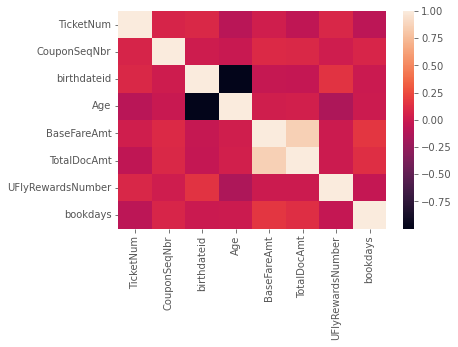

In [77]:
sns.heatmap(df_new.corr())

<AxesSubplot:>

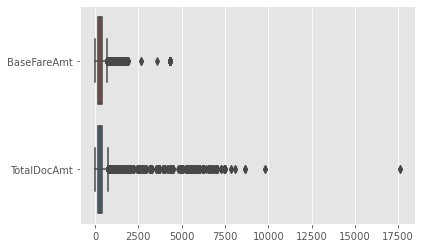

In [78]:
sns.boxplot(data = df_new[['BaseFareAmt', 'TotalDocAmt']], orient="h")

In [79]:
df_new[df_new['TotalDocAmt'] > 17500]

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,Member,Year,Month,bookdays,Trip
518567,DYVDDZ,3375826301516,2,MSP,CUN,2014-11-24,2014-12-04,GARCGL,47415243494144696420493F7C20676574207468697320...,F,38765.0,58.0,NaN,Coach,Coach,Outside Booking,1162.0,17572.0,NaN,NaN,NaN,NaN,NaT,503,SY,O,X,2014,12,10,MSP_CUN
518568,DYVDDZ,3375826301516,1,CUN,MSP,2014-11-24,2014-11-30,GARCGL,47415243494144696420493F7C20676574207468697320...,F,38765.0,58.0,NaN,Coach,Coach,Outside Booking,1162.0,17572.0,NaN,NaN,NaN,NaN,NaT,572,SY,NaN,X,2014,11,6,CUN_MSP


df2['Year'] = df2.ServiceStartDate.apply(lambda x: x.split('-')[0])
df2['Month'] = df2.ServiceStartDate.apply(lambda x: x.split('-')[1])

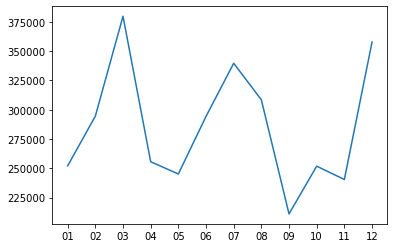

In [19]:
plt.plot(df2['Month'].value_counts().sort_index())

In [35]:
year_month = df2['ServiceStartDate'].apply(lambda x: x.strftime('%Y/%m')).value_counts().sort_index()

In [42]:
year_month.index

Index(['2013/01', '2013/02', '2013/03', '2013/04', '2013/05', '2013/06',
       '2013/07', '2013/08', '2013/09', '2013/10', '2013/11', '2013/12',
       '2014/01', '2014/02', '2014/03', '2014/04', '2014/05', '2014/06',
       '2014/07', '2014/08', '2014/09', '2014/10', '2014/11', '2014/12'],
      dtype='object')

In [90]:
start20 = df2[df2['ServiceStartCity']!='MSP']['ServiceStartCity'].value_counts().head(20)
end20 = df2[df2['ServiceEndCity']!='MSP']['ServiceEndCity'].value_counts().head(20)

<BarContainer object of 20 artists>

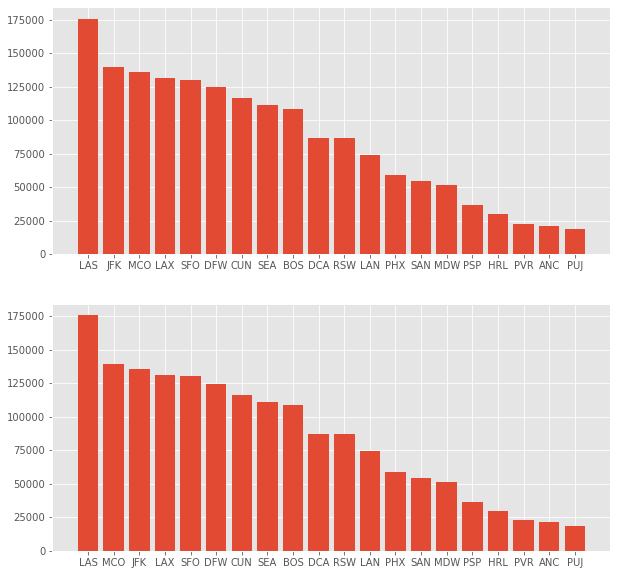

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.bar(start20.index, start20.values)
plt.subplot(212)
plt.bar(end20.index, start20.values)

In [61]:
df2['BookingChannel'].value_counts()

Outside Booking         1471179
SCA Website Booking     1457127
Reservations Booking     262327
Tour Operator Portal     133201
SY Vacation               94601
MSP                        4969
FCM                        3817
DFW                         521
XTM                         476
LAX                         414
LAN                         272
MKE                         262
JFK                         256
MDW                         204
LAS                         180
UFO                         149
SFO                         141
RSW                          91
SEA                          42
PSP                          28
DCA                          24
PHX                          21
HRL                          18
MCO                          17
ANC                           9
BOS                           1
MSN                           1
GJT                           1
MIA                           1
Name: BookingChannel, dtype: int64

In [62]:
df2['TrvldClassOfService'].value_counts()

Coach                   3174105
First Class              167563
Discount First Class      88682
Name: TrvldClassOfService, dtype: int64